In [29]:
import requests
import json
import pandas as pd
import seaborn as sns

In [30]:
url="https://api.usa.gov/crime/fbi/ucr/estimates/states/"
page="?page=1&per_page=200&output=json&api_key="
api_key="iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"

In [31]:
states=['co','wa','ak','or']
response=[]
year=[]
aggravated_assault=[]
burglary=[]
caveats=[]
homicide=[]
larceny=[]
motor_vehicle_theft=[]
population=[]
property_crime=[]
rape_legacy=[]
robbery=[]
state_abbr=[]
violent_crime=[]
stateList=[]

for state in states:
    print(state)
    for i in range(22):
        response = requests.get(url+state+page+api_key).json()
        print(json.dumps(response, indent=4, sort_keys=True))
        aggravated_assault.append(response["results"][i]["aggravated_assault"])
        burglary.append(response["results"][i]["burglary"])
        caveats.append(response["results"][i]["caveats"])
        homicide.append(response["results"][i]["homicide"])
        larceny.append(response["results"][i]["larceny"])
        motor_vehicle_theft.append(response["results"][i]["motor_vehicle_theft"])
        property_crime.append(response["results"][i]["property_crime"])
        rape_legacy.append(response["results"][i]["rape_legacy"])
        robbery.append(response["results"][i]["robbery"])
        violent_crime.append(response["results"][i]["violent_crime"])
        year.append(response["results"][i]["year"])
        state_abbr.append(response["results"][i]["state_abbr"])
        population.append(response["results"][i]["population"])

        
print("end")


co
{
    "error": {
        "code": "OVER_RATE_LIMIT",
        "message": "You have exceeded your rate limit. Try again later or contact us at https://api.usa.gov/contact/ for assistance"
    }
}


KeyError: 'results'

In [4]:
crime_data = pd.DataFrame({
    "state_abbr":state_abbr,
    "year":year,
    "population":population,
    "aggravated_assault":aggravated_assault,
    "burglary":burglary,
    "homicide":homicide,
    "larceny":larceny,
    "motor_vehicle_theft":motor_vehicle_theft,
    "property_crime":property_crime,
    "rape_legacy":rape_legacy,
    "robbery":robbery,
    "violent_crime":violent_crime
    })
#, index=state_abbr

In [5]:
crime_data.head()

,aggravated_assault,burglary,homicide,larceny,motor_vehicle_theft,population,property_crime,rape_legacy,robbery,state_abbr,violent_crime,year
0,11194,35001,216,136184,14520,3747000,185705,1480,3604,CO,16494,1995
1,9763,34436,180,130576,15206,3823000,180218,1765,3755,CO,15463,1996
2,9063,30994,157,119801,16107,3893000,166902,1677,3242,CO,14139,1997
3,9704,31231,183,115871,16087,3971000,163189,1883,3238,CO,15008,1998
4,8891,26979,185,109228,14795,4056133,151002,1679,3056,CO,13811,1999


In [6]:
crime_data.to_csv('crime_data_0416.csv')

In [22]:
crime_date_f=crime_data.loc[(crime_data["year"] == 2010)|(crime_data["year"] == 2016)].copy()
total_Crime=crime_date_f.burglary+crime_date_f.aggravated_assault+ \
crime_date_f.motor_vehicle_theft \
+crime_date_f.property_crime+crime_date_f.violent_crime+crime_date_f.robbery+crime_date_f.homicide+ \
crime_date_f.rape_legacy+crime_date_f.larceny
crime_data['total_Crime']=total_Crime
crime_date_f

,aggravated_assault,burglary,homicide,larceny,motor_vehicle_theft,population,property_crime,rape_legacy,robbery,state_abbr,violent_crime,year,total_Crime
15,10816,26196,129,97534,11271,5047692,135001,2230,3164,CO,16339,2010,302680.0
21,11696,23903,204,108336,19611,5540545,151850,3555,3528,CO,18983,2016,341666.0
37,12476,55192,154,168490,25744,6742950,249426,2579,5929,WA,21138,2010,541128.0
43,13100,49180,195,173187,32286,7288000,254653,3077,5651,WA,22023,2016,553352.0
59,3379,3105,31,15535,1619,714146,20259,533,594,AK,4537,2010,49592.0
65,4011,4053,52,17766,3057,741894,24876,1053,850,AK,5966,2016,61684.0
81,5892,20035,96,87494,9128,3838332,116657,1239,2421,OR,9648,2010,252610.0
87,6718,16866,113,91286,13193,4093465,121345,1721,2278,OR,10830,2016,264350.0


In [149]:
crime_data_long = crime_date_f.melt(id_vars=['state_abbr', 'year'],
                        value_name='Sum',
                        var_name='Crime_types')
crime_data_long.head(10)

,state_abbr,year,Crime_types,Sum
0,CO,2010,aggravated_assault,10816
1,CO,2016,aggravated_assault,11696
2,WA,2010,aggravated_assault,12476
3,WA,2016,aggravated_assault,13100
4,AK,2010,aggravated_assault,3379
5,AK,2016,aggravated_assault,4011
6,OR,2010,aggravated_assault,5892
7,OR,2016,aggravated_assault,6718
8,CO,2010,burglary,26196
9,CO,2016,burglary,23903


In [148]:
#crime_date_ff

In [150]:
array = ['burglary', 'property_crime','violent_crime','motor_vehicle_theft']
crime_data_long_1=crime_data_long.loc[crime_data_long["Crime_types"].isin(array)]
crime_data_long_1

,state_abbr,year,Crime_types,Sum
8,CO,2010,burglary,26196
9,CO,2016,burglary,23903
10,WA,2010,burglary,55192
11,WA,2016,burglary,49180
12,AK,2010,burglary,3105
13,AK,2016,burglary,4053
14,OR,2010,burglary,20035
15,OR,2016,burglary,16866
32,CO,2010,motor_vehicle_theft,11271
33,CO,2016,motor_vehicle_theft,19611


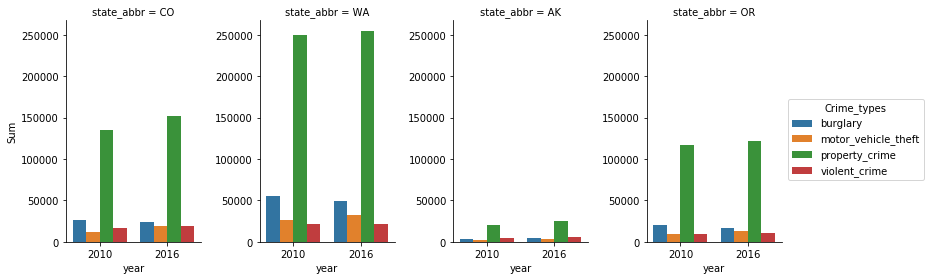

In [151]:
ay = sns.factorplot(x="year", y="Sum",
                    hue="Crime_types", col="state_abbr",
                   data=crime_data_long_1, kind="bar",
                    size=4, aspect=.7);

In [140]:
ay.savefig("crime_stats.jpg") 

In [152]:
crime_date_1=crime_date_f[['state_abbr','year','total_Crime']]

In [153]:

crime_date_1.head()


,state_abbr,year,total_Crime
15,CO,2010,302680
21,CO,2016,341666
37,WA,2010,541128
43,WA,2016,553352
59,AK,2010,49592


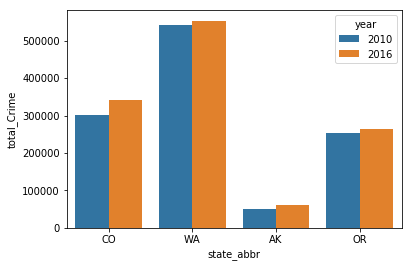

In [154]:
 ax = sns.barplot(x="state_abbr", y="total_Crime", hue="year", data=crime_date_1)

In [112]:
fig = ax.get_figure()
fig.savefig("total_crime.jpg") 